## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head())
df.tail()

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     82
3  2008-08-01 00:00:00        c#    503
4  2008-08-01 00:00:00       c++    164


,DATE,TAG,POSTS
2672,2024-08-01 00:00:00,php,837
2673,2024-08-01 00:00:00,python,4647
2674,2024-08-01 00:00:00,r,886
2675,2024-08-01 00:00:00,ruby,108
2676,2024-08-01 00:00:00,swift,559


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
print(df.columns)
df.shape


Index(['DATE', 'TAG', 'POSTS'], dtype='object')


(2677, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2677
TAG      2677
POSTS    2677
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2530547
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2203581
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1917615
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1620161
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1466754
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,810064
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,508379
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,405791
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,334738


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,193,193
c,193,193
c#,194,194
c++,193,193
delphi,193,193
go,178,178
java,193,193
javascript,193,193
perl,193,193


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'][1]
# or
df.DATE[1]

'2008-08-01 00:00:00'

In [10]:
print(pd.to_datetime(df.DATE[1]) )
type(pd. to_datetime(df.DATE[1]) )

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [12]:
# test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
#                         'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
#                         'Power': [100, 80, 25, 50, 99, 75, 5]})
# test_df
# pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
# pivoted_df
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1124.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,721.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,185.0,735.0,2715.0,1305.0,105.0,302.0,2557.0,4230.0,26.0,1175.0,7303.0,1533.0,114.0,685.0
2024-05-01,178.0,660.0,2471.0,1417.0,101.0,268.0,2250.0,3974.0,38.0,1146.0,6859.0,1374.0,117.0,610.0
2024-06-01,86.0,532.0,1936.0,1063.0,68.0,223.0,1675.0,2954.0,29.0,947.0,5050.0,1087.0,109.0,576.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_df.shape

(194, 14)

In [14]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [15]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1124.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,721.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
reshaped_df.count()

TAG
assembly      193
c             193
c#            194
c++           193
delphi        193
go            178
java          193
javascript    193
perl          193
php           193
python        193
r             191
ruby          193
swift         184
dtype: int64

In [17]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1124.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,721.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,185.0,735.0,2715.0,1305.0,105.0,302.0,2557.0,4230.0,26.0,1175.0,7303.0,1533.0,114.0,685.0
2024-05-01,178.0,660.0,2471.0,1417.0,101.0,268.0,2250.0,3974.0,38.0,1146.0,6859.0,1374.0,117.0,610.0
2024-06-01,86.0,532.0,1936.0,1063.0,68.0,223.0,1675.0,2954.0,29.0,947.0,5050.0,1087.0,109.0,576.0


In [18]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

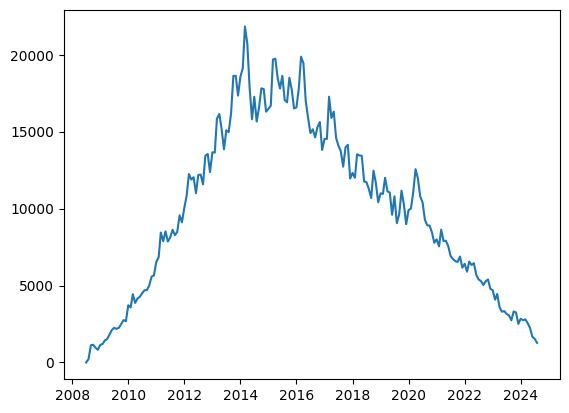

In [24]:
plt.plot(reshaped_df.index, reshaped_df.java)

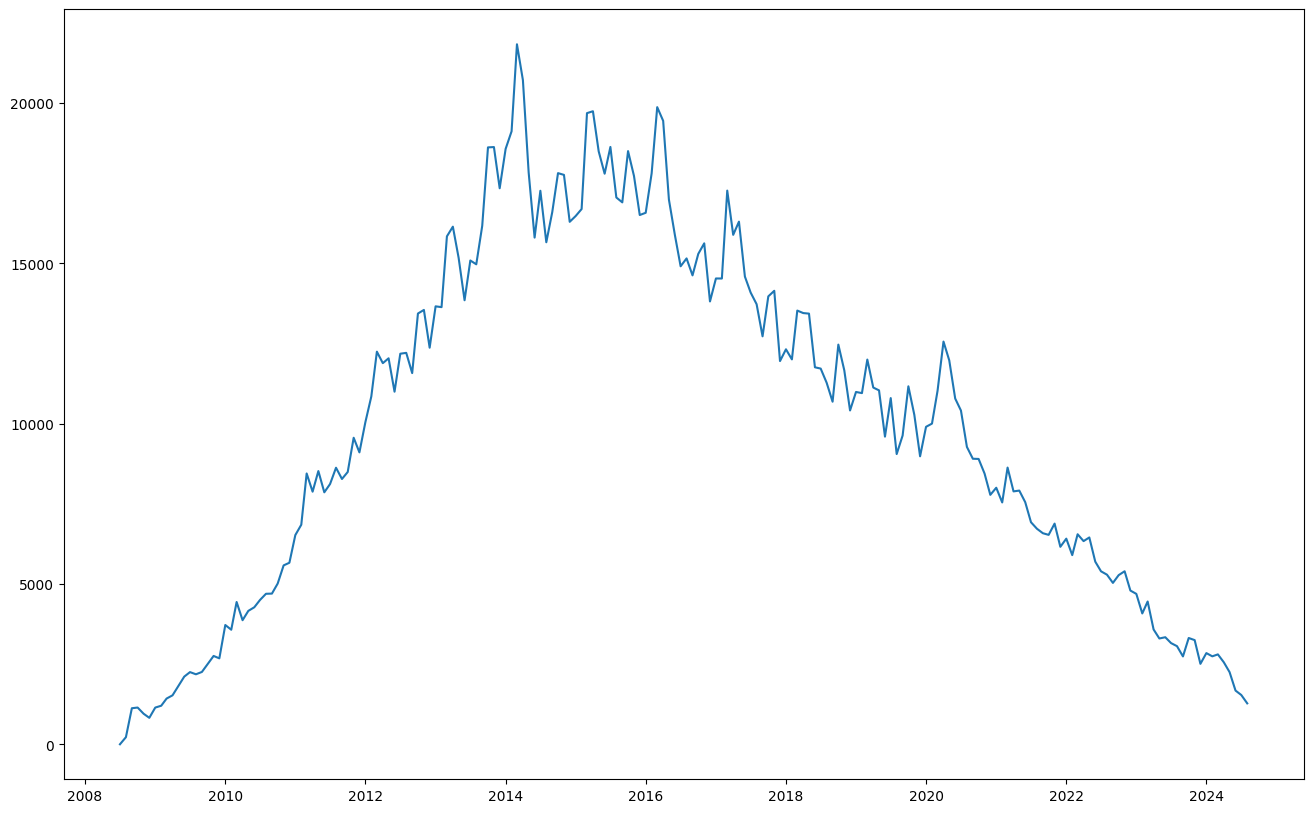

In [25]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

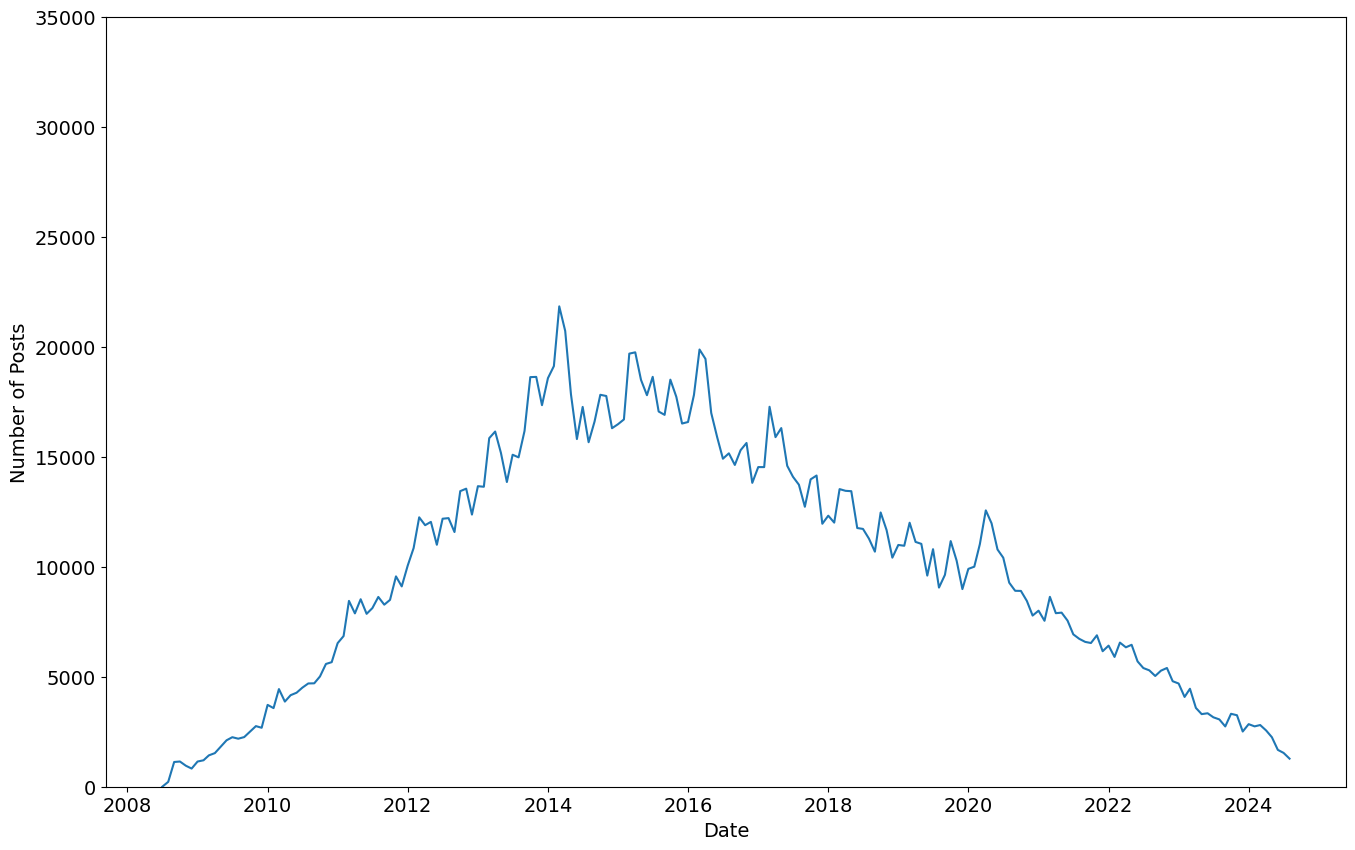

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt. plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

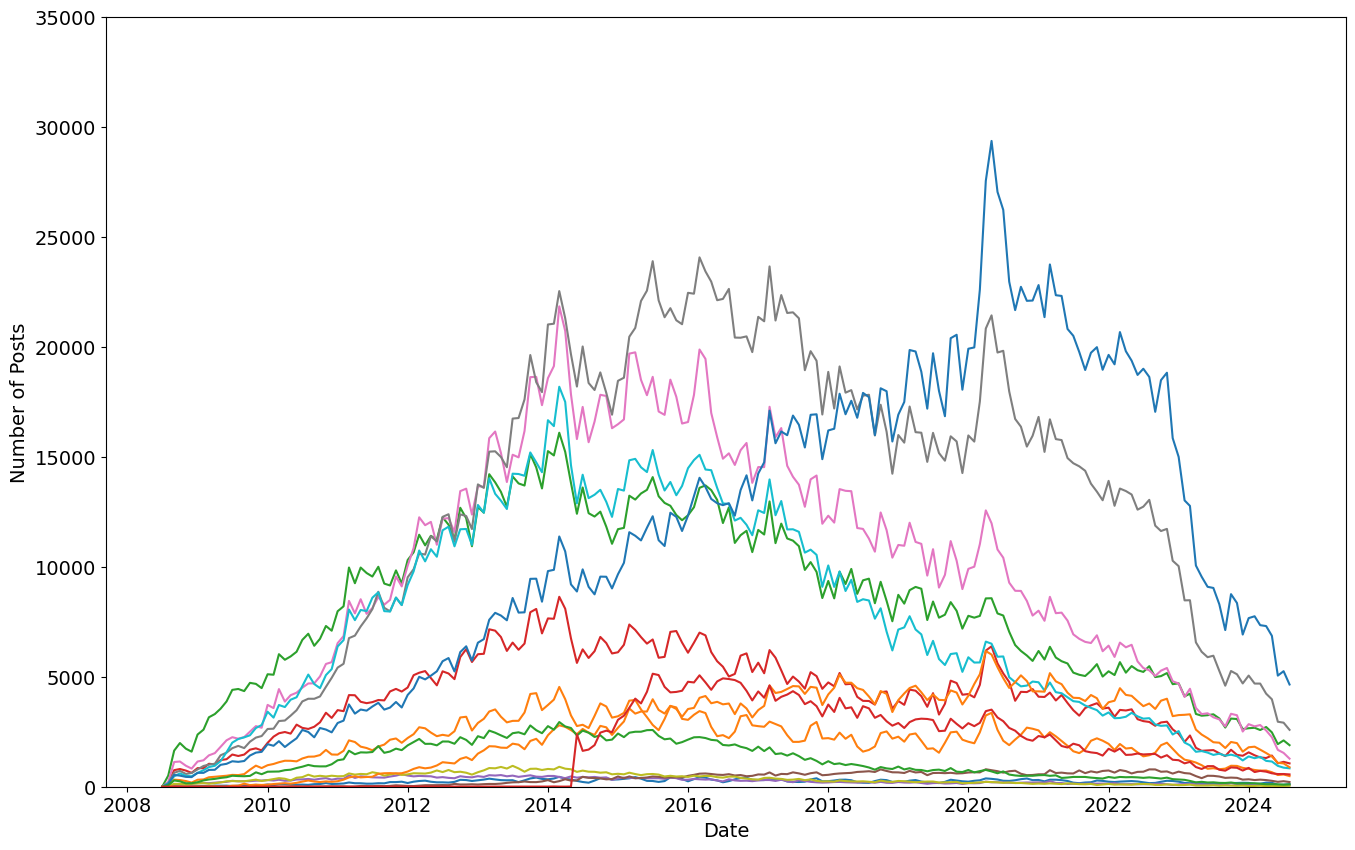

In [31]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt. plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

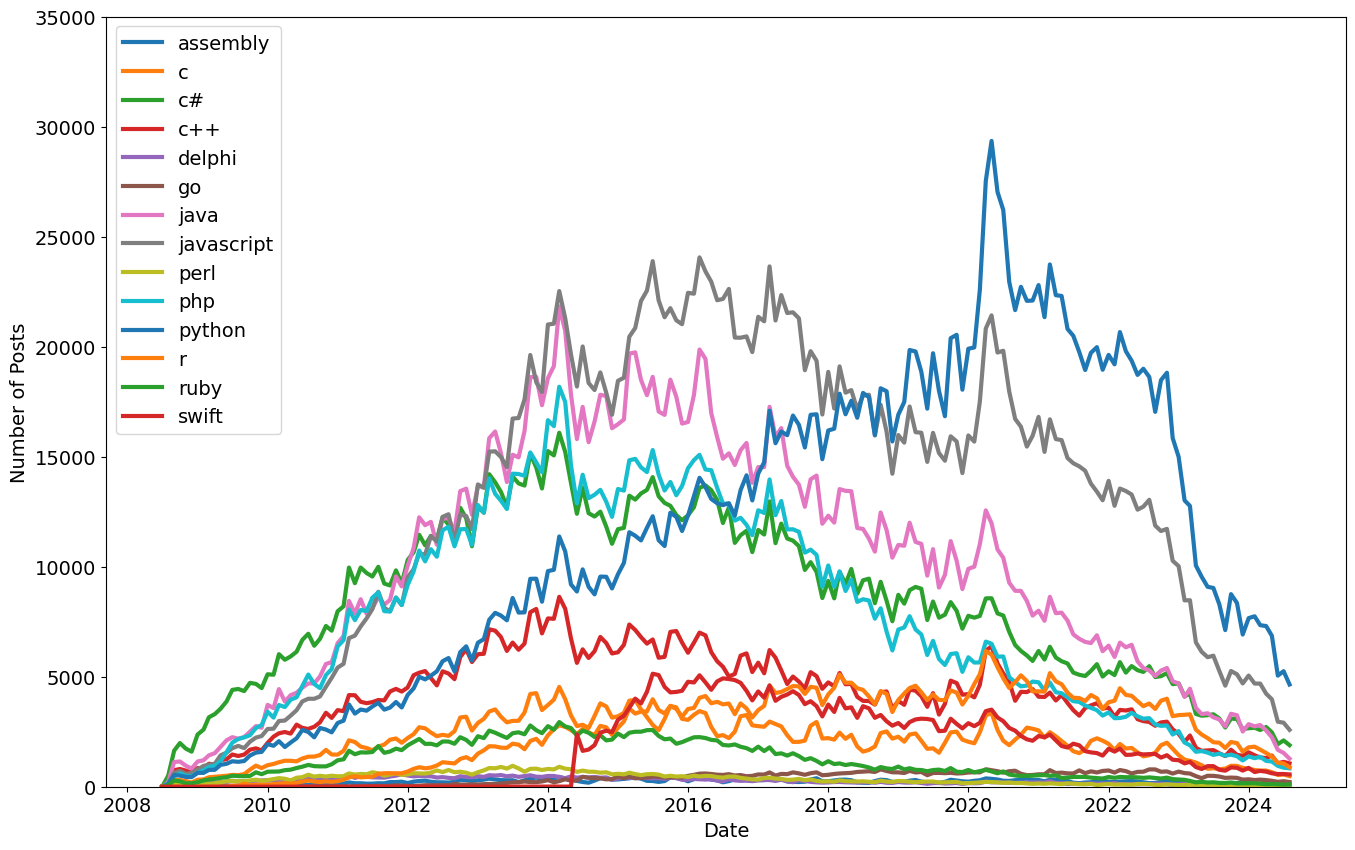

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=column)
#  Instructor solution in 2020: label=reshaped_df[column].name
plt.legend(fontsize=14)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

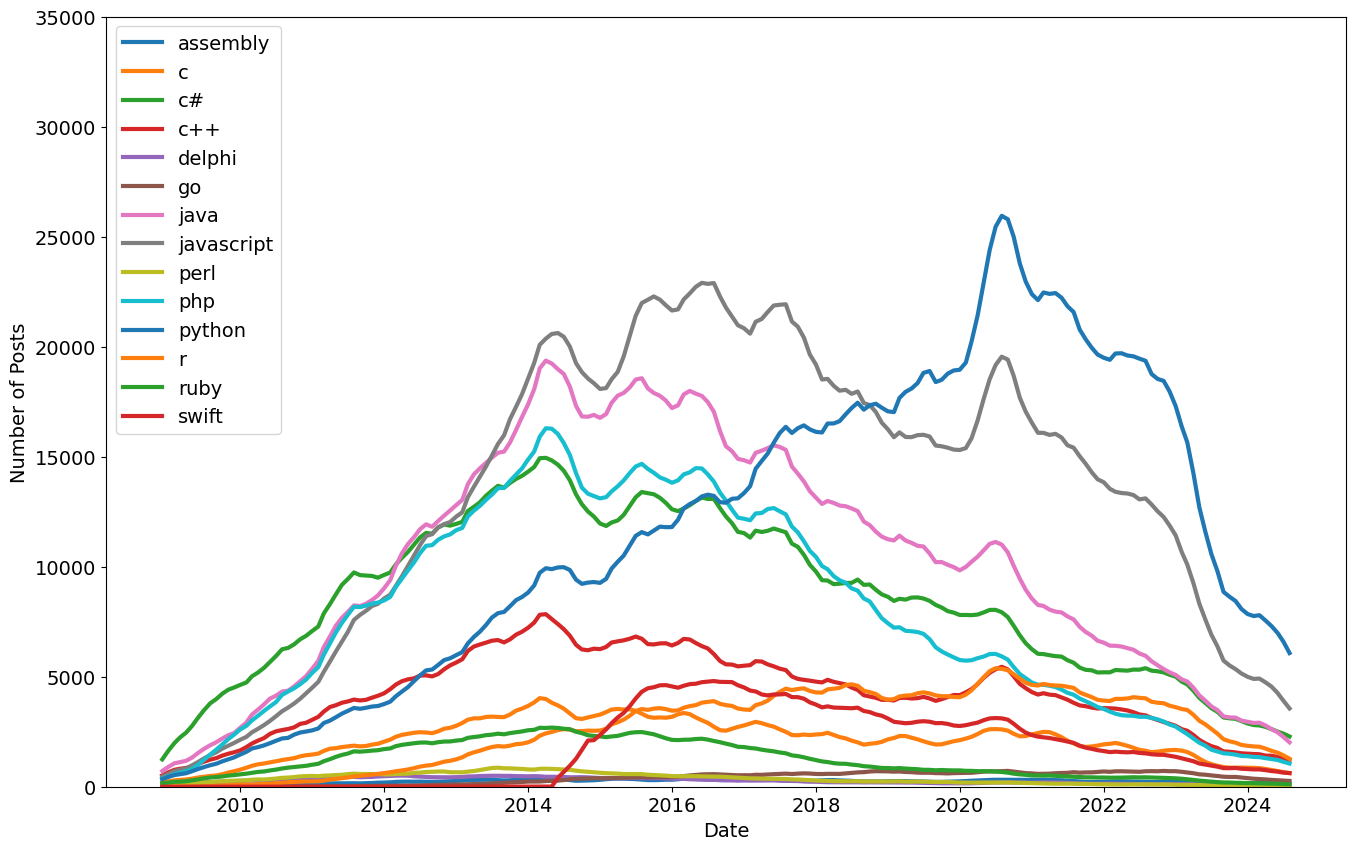

In [38]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=14)

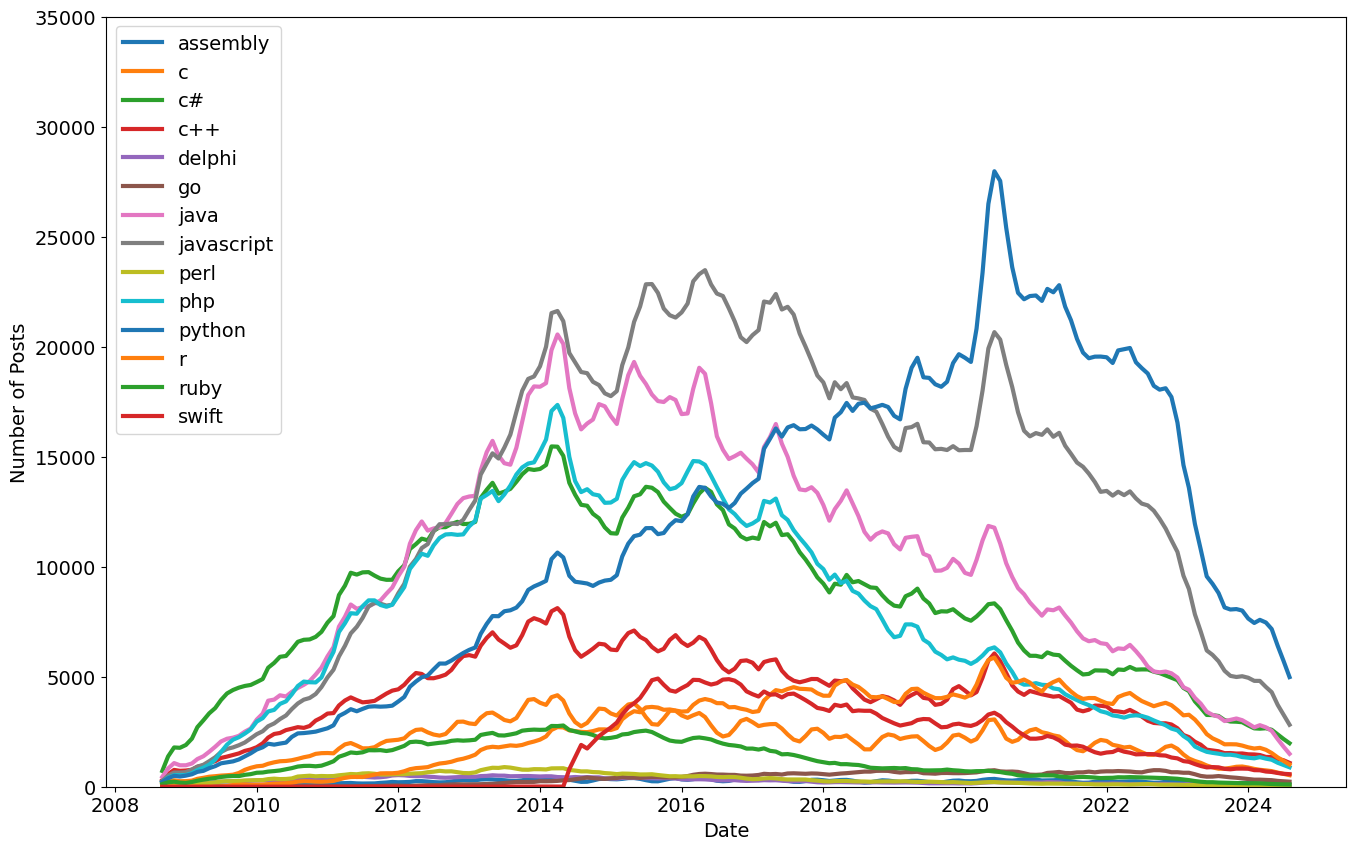

In [39]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=14)

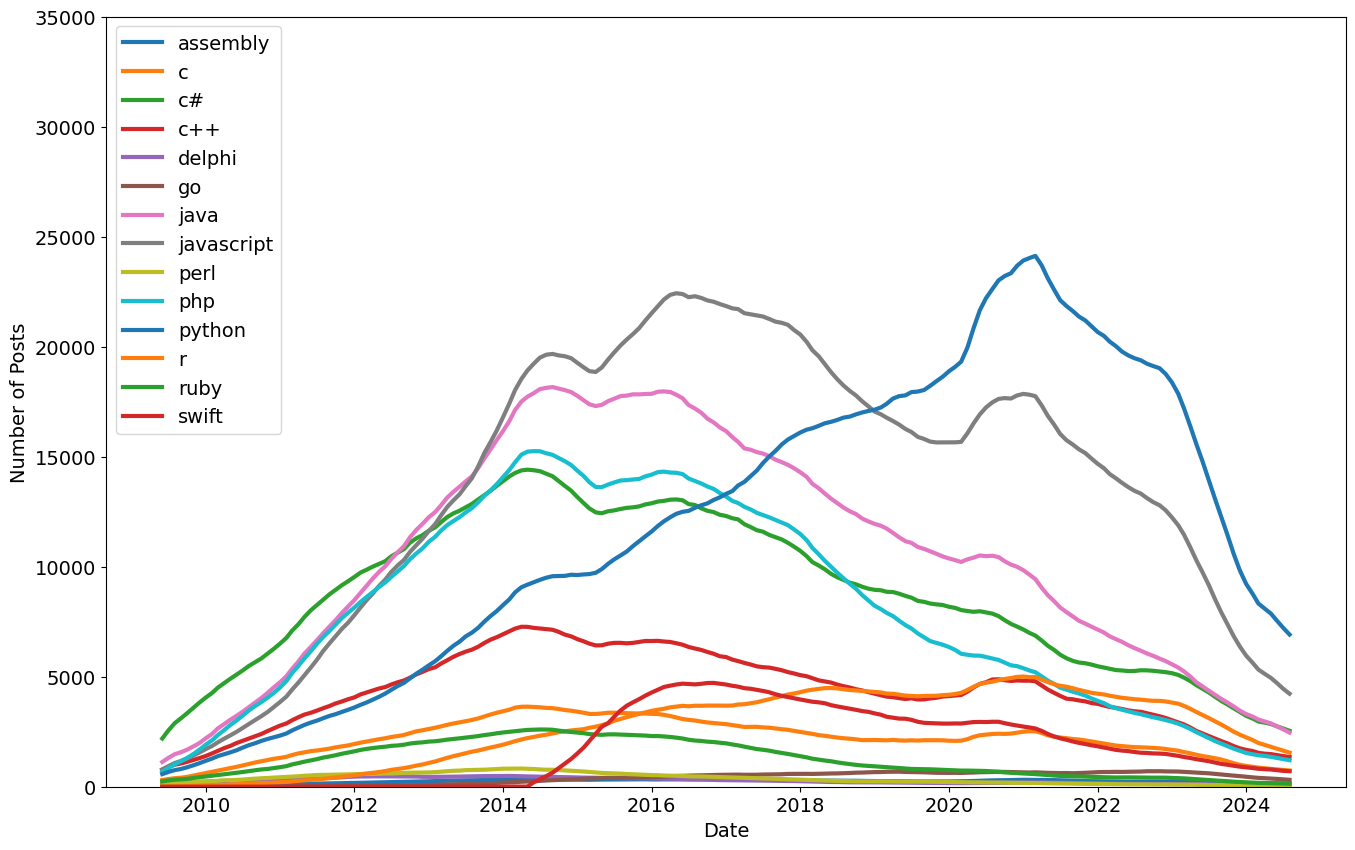

In [40]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=column)
 
plt.legend(fontsize=14)